# Random linear classifier
by uramoon@kw.ac.kr<br>
(<a href="https://raw.githubusercontent.com/ronreiter/interactive-tutorials/master/LICENSE">Apache 2.0 License</a>)<br><br>
멀티 스타트 기법으로 선형 분류기(**퍼셉트론**)를 만들어봅시다.<br>
영국의 유명한 농학자이자 통계학자인 로널드 피셔경(1890~1962)의 Iris 데이터셋의 **일부**를 사용합니다.<br><br>

꽃받침 길이 (cm), 꽃받침 너비 (cm), 꽃잎 길이 (cm), 꽃잎 너비 (cm)로 Iris setosa (-1로 표시)와<br>
Iris versicolor (+1로 표시)를 분류할 것입니다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Irissetosa1.jpg/1280px-Irissetosa1.jpg" height=200><figcaption>Iris setosa 출처: https://en.wikipedia.org/wiki/Iris_setosa</figcaption>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Blue_Flag%2C_Ottawa.jpg/220px-Blue_Flag%2C_Ottawa.jpg" height=200><figcaption>Iris versicolor 출처: https://en.wikipedia.org/wiki/Iris_versicolor</figcaption>

## 문제 해결 방법

1. 주어진 입력을 보고 Iris setosa인지 Iris versicolor인지 분류할 수 있는 알고리즘을 갖고 있는 사람: **직접 코딩**하여 해결<br>
<여기에 해당하시는 분들은 아래 참고자료를 보지 말고 4개의 입력을 받아 그 꽃이 Iris setosa인지 Iris versicolor인지 분류하는 프로그램을 만들어 제출하세요.>
2. 알고리즘은 없지만 충분히 많은 예제가 있어 컴퓨터가 스스로 분류할 수 있도록 훈련이 가능할 것 같은 경우: **기계학습**으로 해결<br>
<여기에 해당하시는 분들은 선형 분류기에 속하면서 딥 러닝의 가장 기본적인 유닛이라 할 수 있는 **퍼셉트론**을 훈련해 볼 것입니다.>

## 퍼셉트론
<img src="https://user-images.githubusercontent.com/37301677/107141159-5e088a80-696a-11eb-8424-b3bc3c054b99.PNG" height=600><figcaption>퍼셉트론 그림 출처: https://ysbsb.github.io/machine_learning/2021/02/07/Perceptron.html</figcaption>

- $x_0$에는 항상 1이 입력되어 $b (=w_{0})$가 곱해집니다. (일차함수의 절편에 해당)
- $x_1$에는 꽃잎 너비가 입력되어 $w_1$이 곱해집니다.
- $x_2$에는 꽃잎 길이가 입력되어 $w_2$이 곱해집니다.
- $x_3$에는 꽃받침 너비가 입력되어 $w_3$이 곱해집니다.
- $x_4$에는 꽃받침 길이가 입력되어 $w_4$이 곱해집니다.<br>
<$x_{i}$의 순서에 큰 의미는 없습니다. 즉, $x_1$에 꽃받침 길이, $x_2$에 꽃받침 너비, ... 와 같이 입력해도 됩니다.>

위에서 곱해진 값들은 퍼셉트론에서 다음과 같이 모두 더해진 후
$$
w_{4}x_{4}+w_{3}x_{3}+w_{2}x_{2}+w_{1}x_{1}+w_{0}
$$
활성화 함수를 통과합니다.

활성화 함수에는 여러 종류가 있는데 (https://en.wikipedia.org/wiki/Activation_function), 여기에서는 위의 그림과 같이 단순한 계단 모양의 step function을 사용해 봅니다. 즉, 모두 더해진 값이 0보다 작으면 -1 (Iris setosa)을 출력하고, 0보다 크거나 같으면 +1 (Iris versicolor)을 출력합니다.

이와 같은 퍼셉트론에 우리가 $w_{4}, w_{3}, w_{2}, w_{1}, w_{0}$의 값을 잘 설정해준다면 퍼셉트론은 주어진 입력값에 대해 그 꽃이 -1 (Iris setosa)인지 +1 (Iris versicolor)인지 정확하게 알려줄 것입니다. 즉 퍼셉트론을 훈련하는 것은 훈련 데이터를 보고 $w_{4}, w_{3}, w_{2}, w_{1}, w_{0}$의 값을 올바르게 설정하는 문제라 할 수 있습니다. 이 과제에서 사용할 퍼셉트론은 다섯 개의 실수 $w_{4}, w_{3}, w_{2}, w_{1}, w_{0}$만 저장하고 있으면 충분하다는 것을 기억하세요.


## 일반적인 인공 신경망 훈련법

일반적인 인공 신경망에서 $w_{i}$의 값들을 찾는 문제는 NP-hard입니다. 즉 합리적인 시간 내에 정답을 제대로 찾는 알고리즘이 존재하지 않으므로 다음과 같은 휴리스틱(경사 하강법)을 사용합니다.

1. 모든 $w_{i}$ 값들을 무작위로 설정한다.
2. 무작위로 설정된 인공 신경망이 훈련 데이터를 얼마나 잘 예측하는지 평가한다.
3. 현재의 인공 신경망 성능이 만족스럽지 않다면 다음을 반복:
4. >훈련 데이터에 대한 예측 성능을 높이려면 각 $w_{i}$의 값을 높이는 것이 좋을지 낮추는 것이 좋을지 **미분**을 이용해서 판단 후 적당하게 그 값을 조정한다.
5. >변경된 $w_{i}$ 값들로 설정된 인공 신경망이 훈련 데이터를 얼마나 잘 예측하는지 평가한다.

## 멀티 스타트 알고리즘으로 퍼셉트론 훈련해보기

위의 경사 하강법은 미분이 필요하여 Spiking neural network과 같은 제3세대 네트워크를 훈련시킬 수 없습니다. 반면 오늘 실습해볼 멀티 스타트 알고리즘은 구현이 매우 간단하고 미분이 필요없어 모든 종류의 네트워크의 훈련에 사용될 수 있습니다. Uber와 같은 회사에서는 심층 강화학습에 멀티 스타트 알고리즘과 성격이 유사한 유전 알고리즘 등을 사용해 심층 신경망을 훈련합니다. (본 과제와 같이 간단한 문제에서는 잘 동작하지만 강화학습이 아닌 일반적인 딥러닝 모델의 훈련에는 부적합하니 주의하세요.)

1. 모든 $w_{i}$ 값들을 무작위로 설정한다.
2. 무작위로 설정된 인공 신경망이 훈련 데이터를 얼마나 잘 예측하는지 평가한다.
3. 현재의 인공 신경망 성능이 만족스럽지 않다면 다음을 반복:
4. >모든 $w_{i}$ 값들을 무작위로 설정한다.
5. >변경된 $w_{i}$ 값들로 설정된 인공 신경망이 훈련 데이터를 얼마나 잘 예측하는지 평가한다.

위와 같이 수행해도 되지만 아래 실습에서는 무작위로 $k$개의 퍼셉트론을 만들고, 그 중에서 성능이 가장 뛰어난 퍼셉트론을 하나 선택할 것입니다.

## 데이터 복사하기
왼쪽 파일 메뉴를 클릭하여 iris.zip 파일을 업로드 후 실행해주세요.

In [88]:
!unzip iris.zip

Archive:  iris.zip
replace iris_test.data? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: iris_test.data          
replace iris_train.data? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: iris_train.data         


iris_train.data는 훈련 데이터이고, iris_test.data는 테스트 데이터입니다. <br>
훈련 데이터를 살펴봅시다.

In [89]:
!head iris_train.data

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


훈련 데이터의 첫 번째 예제는 꽃받침 길이가 5.1 cm, 너비가 3.5 cm, 꽃잎 길이가 4.0 cm, 너비가 0.2일 때 Iris setosa임을 알려줍니다.

In [90]:
# iris_train.data의 행 (예제 수)
!wc -l iris_train.data  # !(리눅스명령어 쓸 때 사용)wordcount -line filename의 뜻

80 iris_train.data


TODO: 테스트 데이터의 예제 수를 출력해보세요.

In [91]:
# TODO: iris_test.data의 행의 개수(예제 수)를 출력해보세요.
!wc -l iris_test.data

20 iris_test.data


## 데이터 만들기
데이터는 꽃받침 길이, 너비, 꽃잎 길이, 너비 네 개의 어트리뷰트를 지닙니다.<br>
레이블에는 정답이 기재되어 있습니다.
1. 훈련 데이터 (train_data): [[5.1, 3.5, 4.0, 0.2], [4.9, ...], ...]<br>
예) a. train_data[0]은 첫 번째 예제의 데이터: [5.1, 3.5, 4.0, 0.2], <br>train_data[0][0]은 첫 번째 예제의 첫 번째 어트리뷰트 값: 5.1
2. 훈련 레이블 (train_label): [-1, -1, -1, ...]<br>
예) train_label[0] = 첫 번째 예제의 정답 (-1: Iris-setosa)
3. 테스트 데이터 (test_data)
4. 테스트 레이블 (test_label)



In [92]:
import numpy as np

# TODO: 각 변수에 적절한 크기로 비어있는 NumPy 배열을 만들어줍시다.
# https://numpy.org/doc/stable/reference/generated/numpy.empty.html
train_data = np.empty((80,4))
train_label = np.empty(80, dtype='int')
test_data = np.empty((20,4))
test_label = np.empty(20, dtype='int')

In [93]:
# TODO: train_data와 train_label 생성
with open('iris_train.data') as fp:
    for i, line in enumerate(fp):
        items = line.split(',')
        features = list(map(float, items[:-1]))
        label = items[-1].strip()
        train_data[i, :] = features
        if label == 'Iris-setosa':
            train_label[i] = -1
        elif label == 'Iris-versicolor':
            train_label[i] = 1
        else:
            raise ValueError(f"Unexpected label: {label}")
print(train_data)
print(train_label) # TODO: 내용 확인용, 지우고 적절한 코드를 넣으세요.

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]
 [5.  2.  3.5 1. ]
 [5.9 3.  4.2 1.5]
 [6.  2.2 4.  1. ]
 [6.1 2.9 4.

위에서 생성한 train_data와 train_label에 값이 잘 입력됐는지 확인하셔도 좋습니다. **train_data에 문자열이 들어가면 안됩니다.**

In [94]:
# TODO: test_data와 test_label 생성
with open('iris_test.data') as fp:
    for i, line in enumerate(fp):
        items = line.split(',')
        features = list(map(float, items[:-1]))
        label = items[-1].strip()
        test_data[i, :] = features
        if label == 'Iris-setosa':
            test_label[i] = -1
        elif label == 'Iris-versicolor':
            test_label[i] = 1
        else:
            raise ValueError(f"Unexpected label: {label}")
print(test_data)
print(test_label)

[[5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [5.5 2.6 4.4 1.2]
 [6.1 3.  4.6 1.4]
 [5.8 2.6 4.  1.2]
 [5.  2.3 3.3 1. ]
 [5.6 2.7 4.2 1.3]
 [5.7 3.  4.2 1.2]
 [5.7 2.9 4.2 1.3]
 [6.2 2.9 4.3 1.3]
 [5.1 2.5 3.  1.1]
 [5.7 2.8 4.1 1.3]]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1]


# 데이터 확인하기
직선으로 두 꽃이 나눠진다면 선형 분류기로 풀 수 있습니다.

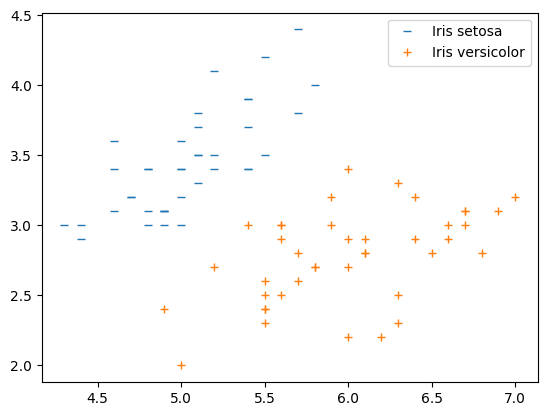

In [95]:
# TODO: 아래 positives를 완성하세요.

import matplotlib.pyplot as plt

# label에 따라 훈련 데이터 나누기
negatives = train_data[train_label == -1]
positives = train_data[train_label == 1]# TODO

# 꽃받침의 길이 (x축)와 너비 (y축)에 따른 꽃의 종류 확인하기
plt.plot(negatives[:, 0], negatives[:, 1], '_', label='Iris setosa')
plt.plot(positives[:, 0], positives[:, 1], '+', label='Iris versicolor')
plt.legend()
plt.show()

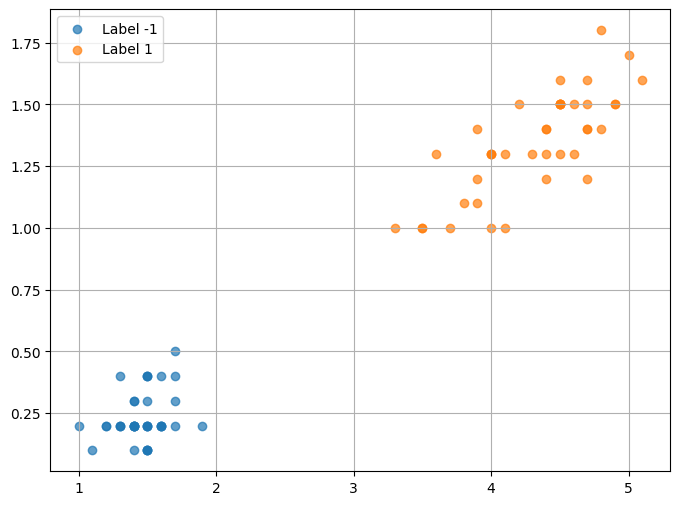

In [96]:
# TODO: 꽃잎 길이 (x축)와 너비 (y축)에 따른 꽃의 종류 확인하기
petal_length = train_data[:, 2]
petal_width = train_data[:, 3]
plt.figure(figsize=(8, 6))
for label in np.unique(train_label):
    plt.scatter(
        petal_length[train_label == label],
        petal_width[train_label == label],
        label=f'Label {label}',
        alpha=0.7
    )
plt.legend()
plt.grid(True)
plt.show()

사실은 쉬운 문제였습니다. 직선으로 두 꽃이 나눠지니 선형 분류기인 퍼셉트론도 이 문제를 풀 수 있습니다.

## Random linear classifier 구현하기

$k$개의 퍼셉트론을 만들어 각 퍼셉트론이 훈련 데이터를 얼마나 잘 분류하는지 확인하여 그 중에서 가장 성능이 좋은 퍼셉트론을 선택하면 됩니다.

$\mathrm{RANDOM-LINEAR-CLASSIFIER}(\mathfrak{D}_{n}, k, d)$
<br>#$\mathfrak{D}_{n}$는 $n$개의 예제를 지닌 훈련 데이터, $k$는 만들어낼 분류기 개수, $d$는 각 예제의 입력 인자 개수 (여기에서는 4)
1. **for** $j=1$ **to** $k$
<br>#$k$개의 무작위 선형 분류기를 만든다.
2. >randomly sample $(w^{(j)}, w_{0}^{(j)})$ from $(\mathbf{R}^{d}, \mathbf{R})$
<br>#각 입력마다 무작위 실수 하나씩, 그리고 절편에 해당하는 무작위 실수 하나 생성 (총 $d+1$ 개)
<br>#분류기는 단순히 $d+1$ 개의 실수로만 구성되어 있음에 주목
3. $j^{*}=\mathrm{arg min}_{j \in \{1,...,k\}} \varepsilon_{n}(w^{(j)}, w_{0}^{(j)})$
<br>#$k$개의 무작위 선형 분류기 중 가장 성능이 좋은 것을 고른다. ($\varepsilon_{n}$은 훈련 데이터에서 loss 값을 계산해주는 함수, 아래에서 설명함)
4. **return** $(w^{(j^*)}, w_{0}^{(j^*)})$
<br># 가장 성능이 좋은 분류기를 반환한다.

In [97]:
#TODO: 아래 lowest, highest, k에 본인이 생각하는 값 기재, 결과가 잘 안나오면 나중에 수정 필요

import random

# 각 w가 가질 수 있는 값의 최소값과 최대값을 적절히 설정해주어야 합니다.
lowest = -1#TODO
highest = 1#TODO

# 무작위로 몇 개 만들면 충분할지 가늠해서 적어보세요.
k = 10#TODO

In [98]:
# TODO: k개의 선형 분류기를 랜덤하게 만들어 NumPy 배열에 저장하세요.
n_features = 4
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
# Hint: 이 과제에서 하나의 퍼셉트론은 몇 개의 숫자를 갖고 있어야 할까요?
perceptrons = np.random.uniform(lowest, highest, (k, n_features+1))#TODO

## 퍼셉트론으로 예측해보기

4개의 숫자가 입력되었을 때 퍼셉트론이 -1 (Iris setosa) 혹은 1 (Iris versicolor)을 출력하도록 만들어봅시다.

In [99]:
# TODO: 5개의 숫자를 지닌 퍼셉트론에 4개의 숫자가 입력되었을 때 예측값을 반환하는 함수를 만들어보세요.
# Hint: 퍼셉트론이 어떻게 예측하는지 궁금하시면 위에서 퍼셉트론 그림이 그려진 항목의 설명을 참고하시고,
# 선형대수학에서 공부한 점곱 (dot product)을 사용하고 싶으면 아래 링크를 참고하세요.
# https://numpy.org/doc/stable/reference/generated/numpy.dot.html

def predict(perceptron, instance):
  # instance에는 train_data 혹은 test_data의 원소가 들어옵니다.
  assert perceptron.size == 5 and instance.size == 4
  result = 0

  #TODO
  weights = perceptron[:-1]
  bias = perceptron[-1]
  linear_output = np.dot(weights, instance) + bias
  result = 1 if linear_output >= 0 else -1

  assert result == -1 or result == 1
  return result

In [100]:
# predict 함수가 잘 만들어졌는지 테스트

print(predict(np.ones(5), train_data[0]))       # 1이 출력됩니다.
print(predict(np.full(5, -1), train_data[0]))   # -1이 출력됩니다.

1
-1


## 훈련 데이터에 대해 0-1 Loss를 사용해서 각 분류기를 평가해보세요.
Loss (손실) 함수는 학습된 모델의 성능을 평가하며, 예측이 잘못될 수록 그 값이 커집니다. (이상적인 예측 모델의 loss 값은 0)
<br>0-1 Loss를 계산하려면 훈련 데이터를 하나씩 읽어서 예측이 맞았으면 0, 틀렸으면 1을 더해주면 됩니다.
<br>훈련 데이터에 예제가 80개 있으니 Loss는 0부터 80까지 나올 수 있습니다.

In [101]:
# TODO: 주어진 퍼셉트론 (숫자 5개)이 주어진 데이터에 대해서 얼마나 예측을 잘 하는지
# Loss 값을 알려주는 함수를 만들어보세요.
# Hint: data 안의 예제를 하나씩 읽어가며 perceptron이 해당 예제에 대해 어떻게 판단하는지와 (predict 함수 이용)
# 실제 label을 비교하여 틀릴 때마다 loss를 1씩 증가시켜주면 됩니다.

def get_loss(perceptron, data, label):
  assert np.size(data, 0) == label.size
  loss = 0
  #TODO
  for i in range(len(data)):
    prediction = predict(perceptron, data[i])
    if prediction != label[i]:
      loss+=1
  return loss

# get_loss 함수를 잘 만들었는지 테스트, 39가 출력되어야 함
print(get_loss(np.ones(5), train_data, train_label))

39


이제 $k$개의 퍼셉트론에 대해 0-1 Loss를 계산할 것입니다.

In [102]:
# TODO: k개의 퍼셉트론에 대해 Loss를 저장할 장소 만들기
losses = np.empty(k)#TODO

# TODO: 훈련 데이터에 대해 각 퍼셉트론의 Loss를 계산해서 저장하세요.
for i in range(k):
  losses[i] = get_loss(perceptrons[i], train_data, train_label)

In [103]:
# 각 분류기들의 Loss 값을 봅시다.
print(losses)

[41. 39. 41. 39. 39. 39. 41. 41.  0. 29.]


## 가장 훌륭한 분류기 꺼내기

In [104]:
best_idx = np.argmin(losses)
best_classifier = perceptrons[best_idx]
print(f'가장 훌륭한 분류기 인덱스:{best_idx}, Loss: {losses[best_idx]}')

가장 훌륭한 분류기 인덱스:8, Loss: 0.0


가장 훌륭한 분류기의 Loss 값이 0으로 잘 나왔나요? 그렇지 않다면 lowest, highest와 k를 다시 설정하여 perceptrons를 다시 만들어보고 잘나올 때까지 반복하고 다음으로 넘어가세요.

## 테스트 데이터로 평가해봅시다.

In [105]:
# TODO: 가장 훌륭한 분류기로 테스트 데이터에 대해 0-1 Loss를 구해보세요.
loss = get_loss(best_classifier, test_data, test_label)#TODO
print(loss)

0


수고하셨습니다 :)<br>
0이 나오면 좋지만 0이 나오지 않을 수도 있습니다. 큰 숫자가 나왔다면 어딘가에 버그가 있을 것입니다.